# DATA ANALYSIS

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

READ THE CSV FILE

In [2]:
df=pd.read_csv('hvac_data.csv')

EXPLORATORY DATA ANALYSIS

In [3]:
df

,Timestamp,Indoor_Temperature,Outdoor_Temperature,Indoor_Humidity,Outdoor_Humidity,CO2_Level,Setpoint_Temperature,Fan_Speed,Compressor_Status,Power_Consumption
0,2024-06-01 00:00:00,24.6,27.9,40.3,48.0,844,22.1,high,on,2.90
1,2024-06-01 00:01:00,20.1,30.6,53.1,67.5,577,21.1,low,on,2.60
2,2024-06-01 00:02:00,23.9,22.7,56.3,70.4,446,21.2,low,off,4.36
3,2024-06-01 00:03:00,23.9,29.4,59.6,43.4,438,21.5,low,off,3.74
4,2024-06-01 00:04:00,22.7,26.6,37.5,71.9,651,22.6,medium,off,4.74
...,...,...,...,...,...,...,...,...,...,...
995,2024-06-01 16:35:00,24.9,22.0,35.2,66.2,561,22.2,medium,on,3.23
996,2024-06-01 16:36:00,20.1,34.8,40.5,66.8,595,21.7,low,off,4.37
997,2024-06-01 16:37:00,23.2,21.5,50.9,49.7,589,22.0,low,on,1.44
998,2024-06-01 16:38:00,20.7,30.0,50.5,59.3,789,21.8,low,off,1.37


In [4]:
df.head()

,Timestamp,Indoor_Temperature,Outdoor_Temperature,Indoor_Humidity,Outdoor_Humidity,CO2_Level,Setpoint_Temperature,Fan_Speed,Compressor_Status,Power_Consumption
0,2024-06-01 00:00:00,24.6,27.9,40.3,48.0,844,22.1,high,on,2.90
1,2024-06-01 00:01:00,20.1,30.6,53.1,67.5,577,21.1,low,on,2.60
2,2024-06-01 00:02:00,23.9,22.7,56.3,70.4,446,21.2,low,off,4.36
3,2024-06-01 00:03:00,23.9,29.4,59.6,43.4,438,21.5,low,off,3.74
4,2024-06-01 00:04:00,22.7,26.6,37.5,71.9,651,22.6,medium,off,4.74


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             1000 non-null   object 
 1   Indoor_Temperature    1000 non-null   float64
 2   Outdoor_Temperature   1000 non-null   float64
 3   Indoor_Humidity       1000 non-null   float64
 4   Outdoor_Humidity      1000 non-null   float64
 5   CO2_Level             1000 non-null   int64  
 6   Setpoint_Temperature  1000 non-null   float64
 7   Fan_Speed             1000 non-null   object 
 8   Compressor_Status     1000 non-null   object 
 9   Power_Consumption     1000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 78.2+ KB


In [7]:
df.isna().sum()

Timestamp               0
Indoor_Temperature      0
Outdoor_Temperature     0
Indoor_Humidity         0
Outdoor_Humidity        0
CO2_Level               0
Setpoint_Temperature    0
Fan_Speed               0
Compressor_Status       0
Power_Consumption       0
dtype: int64

In [8]:
df.describe()

,Indoor_Temperature,Outdoor_Temperature,Indoor_Humidity,Outdoor_Humidity,CO2_Level,Setpoint_Temperature,Power_Consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.462900,25.028500,44.865200,60.849000,669.956000,21.998800,2.971270
std,1.456707,5.688497,8.753276,11.491923,190.016421,0.575421,1.161028
min,20.000000,15.000000,30.000000,40.000000,351.000000,21.000000,1.000000
25%,21.100000,19.900000,37.200000,51.175000,508.000000,21.500000,1.970000
50%,22.500000,25.000000,44.850000,61.700000,658.000000,22.000000,3.005000
75%,23.700000,29.900000,51.900000,70.600000,851.000000,22.500000,3.950000
max,25.000000,35.000000,60.000000,80.000000,1000.000000,23.000000,4.990000


In [9]:
df=df.dropna()

In [10]:
numerical_features = ['Indoor_Temperature', 'Outdoor_Temperature', 'Indoor_Humidity', 'Outdoor_Humidity', 'CO2_Level', 'Setpoint_Temperature', 'Power_Consumption']

In [11]:

Scaler=StandardScaler()
df[numerical_features]=Scaler.fit_transform(df[numerical_features])

In [12]:
df

,Timestamp,Indoor_Temperature,Outdoor_Temperature,Indoor_Humidity,Outdoor_Humidity,CO2_Level,Setpoint_Temperature,Fan_Speed,Compressor_Status,Power_Consumption
0,2024-06-01 00:00:00,1.467810,0.505043,-0.521803,-1.118649,0.916400,0.175959,high,on,-0.061416
1,2024-06-01 00:01:00,-1.622895,0.979923,0.941238,0.579044,-0.489445,-1.562768,low,on,-0.319937
2,2024-06-01 00:02:00,0.987034,-0.409540,1.306999,0.831521,-1.179204,-1.388895,low,off,1.196720
3,2024-06-01 00:03:00,0.987034,0.768865,1.684189,-1.519130,-1.221326,-0.867277,low,off,0.662443
4,2024-06-01 00:04:00,0.162846,0.276398,-0.841843,0.962113,-0.099810,1.045322,medium,off,1.524180
...,...,...,...,...,...,...,...,...,...,...
995,2024-06-01 16:35:00,1.673857,-0.532657,-1.104733,0.465864,-0.573690,0.349832,medium,on,0.222957
996,2024-06-01 16:36:00,-1.622895,1.718624,-0.498943,0.518101,-0.394669,-0.519532,low,off,1.205337
997,2024-06-01 16:37:00,0.506257,-0.620597,0.689778,-0.970645,-0.426261,0.002086,low,on,-1.319552
998,2024-06-01 16:38:00,-1.210801,0.874394,0.644058,-0.134858,0.626807,-0.345659,low,off,-1.379873


In [13]:

LE=LabelEncoder()
df['Fan_Speed']=LE.fit_transform(df['Fan_Speed'])
df['Compressor_Status']=LE.fit_transform(df['Compressor_Status'])

In [14]:
df

,Timestamp,Indoor_Temperature,Outdoor_Temperature,Indoor_Humidity,Outdoor_Humidity,CO2_Level,Setpoint_Temperature,Fan_Speed,Compressor_Status,Power_Consumption
0,2024-06-01 00:00:00,1.467810,0.505043,-0.521803,-1.118649,0.916400,0.175959,0,1,-0.061416
1,2024-06-01 00:01:00,-1.622895,0.979923,0.941238,0.579044,-0.489445,-1.562768,1,1,-0.319937
2,2024-06-01 00:02:00,0.987034,-0.409540,1.306999,0.831521,-1.179204,-1.388895,1,0,1.196720
3,2024-06-01 00:03:00,0.987034,0.768865,1.684189,-1.519130,-1.221326,-0.867277,1,0,0.662443
4,2024-06-01 00:04:00,0.162846,0.276398,-0.841843,0.962113,-0.099810,1.045322,2,0,1.524180
...,...,...,...,...,...,...,...,...,...,...
995,2024-06-01 16:35:00,1.673857,-0.532657,-1.104733,0.465864,-0.573690,0.349832,2,1,0.222957
996,2024-06-01 16:36:00,-1.622895,1.718624,-0.498943,0.518101,-0.394669,-0.519532,1,0,1.205337
997,2024-06-01 16:37:00,0.506257,-0.620597,0.689778,-0.970645,-0.426261,0.002086,1,1,-1.319552
998,2024-06-01 16:38:00,-1.210801,0.874394,0.644058,-0.134858,0.626807,-0.345659,1,0,-1.379873


Text(0.5, 1.0, 'heatmap')

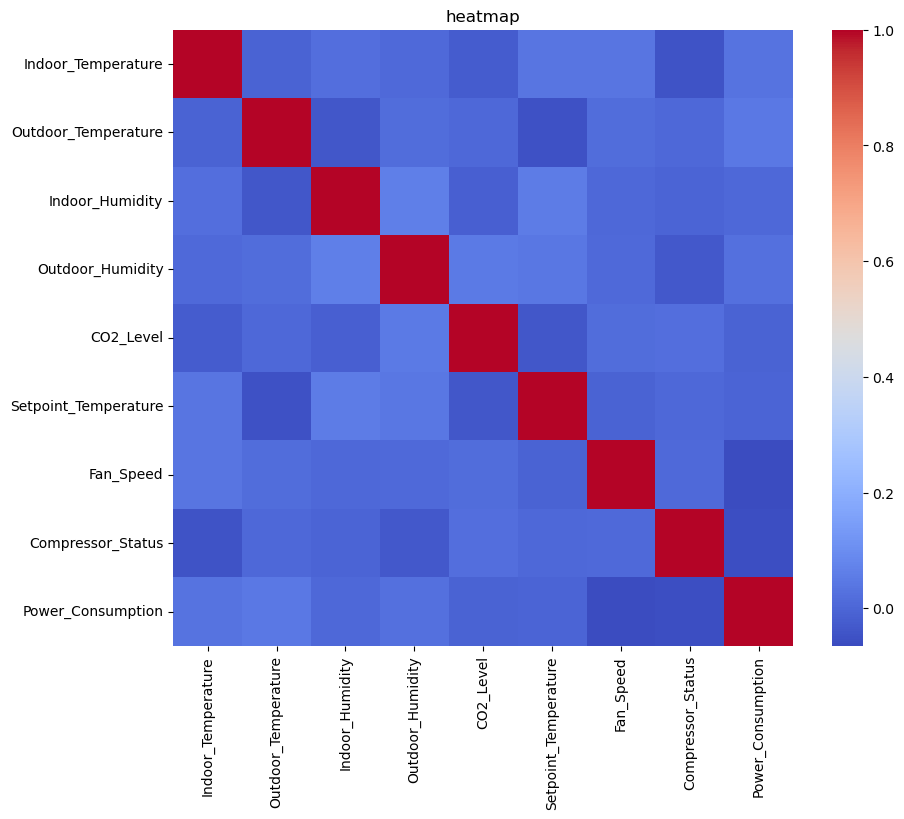

In [15]:
df_without_time_stamp=df.iloc[:,1:]
correlation_matrix=df_without_time_stamp.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.title('heatmap')

WE CAN NOTICE THAT THE ATTRIBUTES DO NOT HAVE MUCH MULTICOLLINAEARITY AMONG THEM THUS WE CAN PROCEED

# WORKING ON BUILDING A MODEL

WE WANT TO USE LINEAR REGRESSION AND SVMS TO BUILD THE OUTPUT VARIABLES

In [16]:
import numpy as np

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Power_Consumption'])  # Features
X=df.drop(columns=['Timestamp'])
y = df['Power_Consumption']  # Target variable


In [18]:
X

,Indoor_Temperature,Outdoor_Temperature,Indoor_Humidity,Outdoor_Humidity,CO2_Level,Setpoint_Temperature,Fan_Speed,Compressor_Status,Power_Consumption
0,1.467810,0.505043,-0.521803,-1.118649,0.916400,0.175959,0,1,-0.061416
1,-1.622895,0.979923,0.941238,0.579044,-0.489445,-1.562768,1,1,-0.319937
2,0.987034,-0.409540,1.306999,0.831521,-1.179204,-1.388895,1,0,1.196720
3,0.987034,0.768865,1.684189,-1.519130,-1.221326,-0.867277,1,0,0.662443
4,0.162846,0.276398,-0.841843,0.962113,-0.099810,1.045322,2,0,1.524180
...,...,...,...,...,...,...,...,...,...
995,1.673857,-0.532657,-1.104733,0.465864,-0.573690,0.349832,2,1,0.222957
996,-1.622895,1.718624,-0.498943,0.518101,-0.394669,-0.519532,1,0,1.205337
997,0.506257,-0.620597,0.689778,-0.970645,-0.426261,0.002086,1,1,-1.319552
998,-1.210801,0.874394,0.644058,-0.134858,0.626807,-0.345659,1,0,-1.379873


In [19]:
y

0     -0.061416
1     -0.319937
2      1.196720
3      0.662443
4      1.524180
         ...   
995    0.222957
996    1.205337
997   -1.319552
998   -1.379873
999    0.102314
Name: Power_Consumption, Length: 1000, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CREATING THE LINEAR REGRESSION MODEL

In [21]:
# Initialize the linear regression model
linear_model = LinearRegression()

In [22]:
X_train_reshaped = X_train.values.reshape(-1, 8)
linear_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = linear_model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.803990803014653e-31
R-squared: 1.0


In [26]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) for regression is:", mae)

Mean Absolute Error (MAE) for regression is: 7.559361123177233e-16


C:\Users\DELL\AppData\Local\Temp\ipykernel_5420\1671849269.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


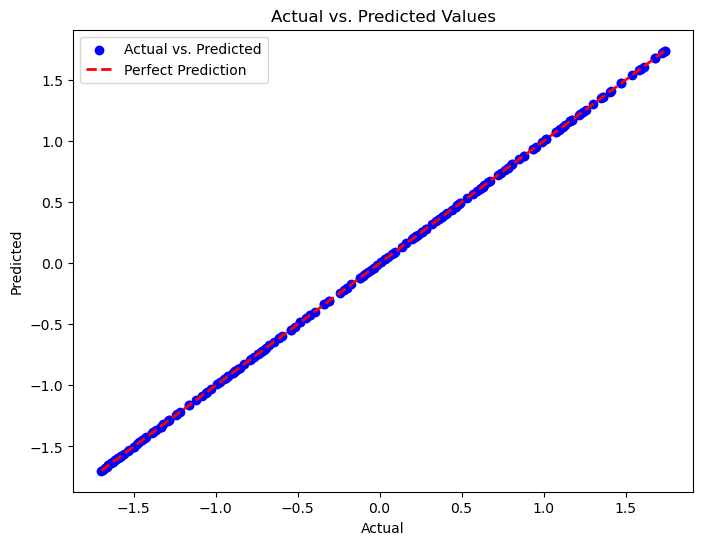

In [27]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


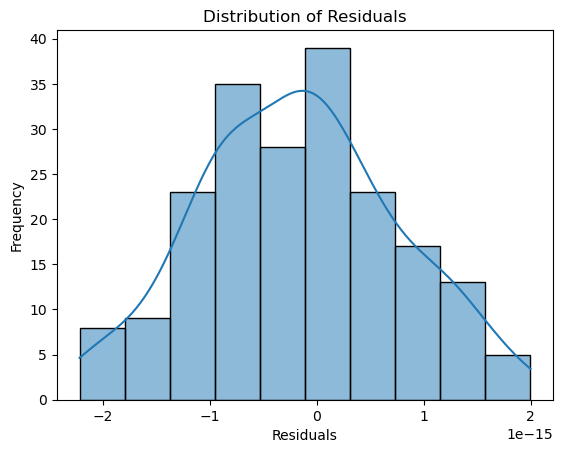

In [28]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [29]:
from sklearn.linear_model import Lasso

# Create Lasso regression model with regularization parameter alpha
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value to control the strength of regularization

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)
print("R-squared (Lasso):", r2_lasso)


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) for Lasso Regression is :", mae)

Mean Squared Error (Lasso): 0.010689842521289373
R-squared (Lasso): 0.9895196153762416
Mean Absolute Error (MAE) for Lasso Regression is : 7.559361123177233e-16


C:\Users\DELL\AppData\Local\Temp\ipykernel_5420\3042104496.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


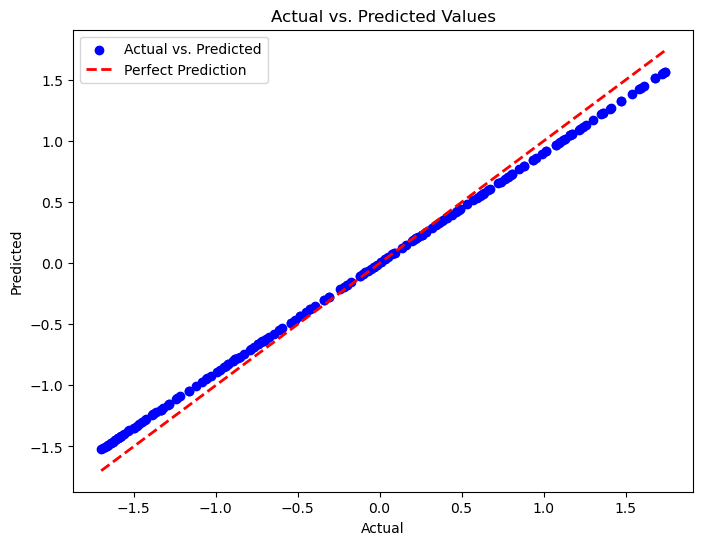

In [30]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

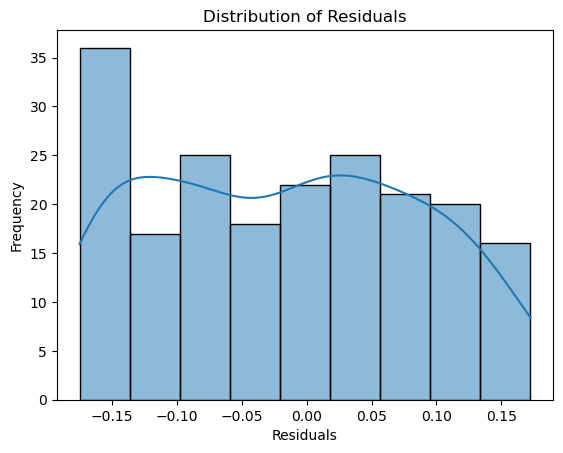

In [31]:
residuals = y_test - y_pred_lasso
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# X_train and X_test should be 2D arrays (samples x features), and y_train and y_test should be 1D arrays (target variable)
# Replace these with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVR model
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) for SVM is:", mae)

Mean Squared Error: 0.003574297035881782
R-squared: 0.9964957381157864
Mean Absolute Error (MAE) for SVM is: 0.051575237906951364


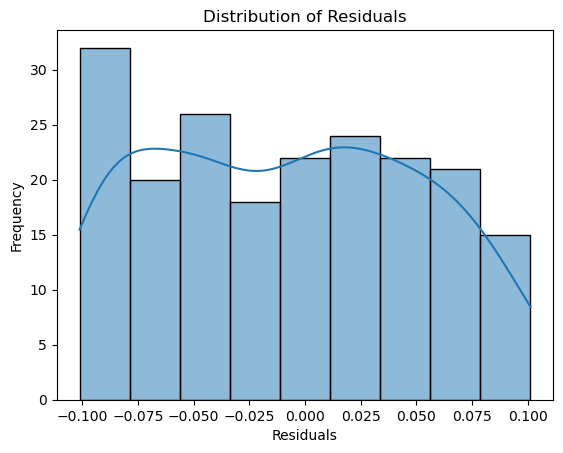

In [33]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Separate features and target (if target is used for supervised learning)
features = df[['Indoor_Temperature', 'Outdoor_Temperature', 'Indoor_Humidity', 'Outdoor_Humidity', 'CO2_Level', 'Setpoint_Temperature', 'Fan_Speed', 'Compressor_Status', 'Power_Consumption']]

# Encode categorical features
categorical_features = ['Fan_Speed', 'Compressor_Status']
numerical_features = ['Indoor_Temperature', 'Outdoor_Temperature', 'Indoor_Humidity', 'Outdoor_Humidity', 'CO2_Level', 'Setpoint_Temperature', 'Power_Consumption']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the features
features_processed = preprocessor.fit_transform(features)


In [35]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust contamination to the expected proportion of anomalies

# Fit the model
model.fit(features_processed)

# Predict anomalies
anomalies = model.predict(features_processed)

# -1 indicates an anomaly, 1 indicates normal
df['Anomaly'] = anomalies


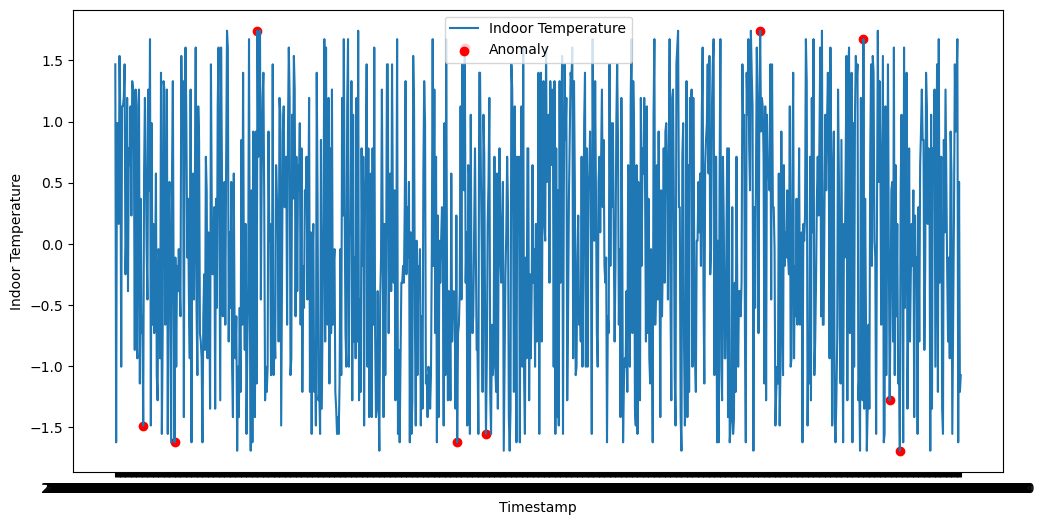

In [36]:
import matplotlib.pyplot as plt

# Plot indoor temperature with anomalies marked
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Indoor_Temperature'], label='Indoor Temperature')
plt.scatter(df['Timestamp'][df['Anomaly'] == -1], df['Indoor_Temperature'][df['Anomaly'] == -1], color='red', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Indoor Temperature')
plt.legend()
plt.show()
